# 1. bias-variance decomposition

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv("Vol_fuel_efficiency_data.csv")
data

,Timestamp,Truck_ID,Engine_Type,Maintenance_History,Weather_Temperature,Average_Speed,Fuel_Consumption
0,2023-01-01 00:00:00,TRK001,Gasoline,No history,23.889392,92.482529,9.712944
1,2023-01-01 01:00:00,TRK001,Gasoline,No history,22.023105,75.861589,10.728945
2,2023-01-01 02:00:00,TRK001,Diesel,No history,11.289818,54.941086,11.583613
3,2023-01-01 03:00:00,TRK001,Diesel,No history,10.137305,52.658868,11.176255
4,2023-01-01 04:00:00,TRK001,Diesel,No history,20.150700,86.757627,10.295938
...,...,...,...,...,...,...,...
115,2023-01-01 19:00:00,TRK005,Gasoline,No history,19.633839,57.852596,10.881121
116,2023-01-01 20:00:00,TRK005,Diesel,Service recently,25.326517,70.795798,11.658100
117,2023-01-01 21:00:00,TRK005,Gasoline,Service recently,23.263413,73.347791,9.326941
118,2023-01-01 22:00:00,TRK005,Gasoline,Service recently,24.613533,63.821579,11.992151


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("Vol_fuel_efficiency_data.csv")

# Convert "Timestamp" column to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

# One-hot encode categorical variables
categorical_cols = ["Truck_ID", "Engine_Type", "Maintenance_History"]
encoder = OneHotEncoder(drop="first")
encoded_features = encoder.fit_transform(data[categorical_cols]).toarray()

# Create column names for the encoded features
encoded_cols = []
for idx, col in enumerate(categorical_cols):
    for cat in encoder.categories_[idx][1:]:
        encoded_cols.append(f"{col}_{cat}")

encoded_df = pd.DataFrame(encoded_features, columns=encoded_cols)
data = pd.concat([data, encoded_df], axis=1)

# Select features and target
features = ["Weather_Temperature", "Average_Speed"] + list(encoded_df.columns)
target = "Fuel_Consumption"

# Split data into features and target
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest Regressor)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 1.04
Mean Squared Error: 1.68
R-squared: -0.55


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error

# ... Load and preprocess data as before ...

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Convert DataFrames to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_val_np = X_val.values
y_val_np = y_val.values

# Perform bias-variance decomposition
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    model, X_train_np, y_train_np, X_val_np, y_val_np, loss='mse', num_rounds=10, random_seed=42
)

print(f"Average Expected Loss: {avg_expected_loss:.2f}")
print(f"Average Bias: {avg_bias:.2f}")
print(f"Average Variance: {avg_var:.2f}")


Average Expected Loss: 1.83
Average Bias: 1.59
Average Variance: 0.24


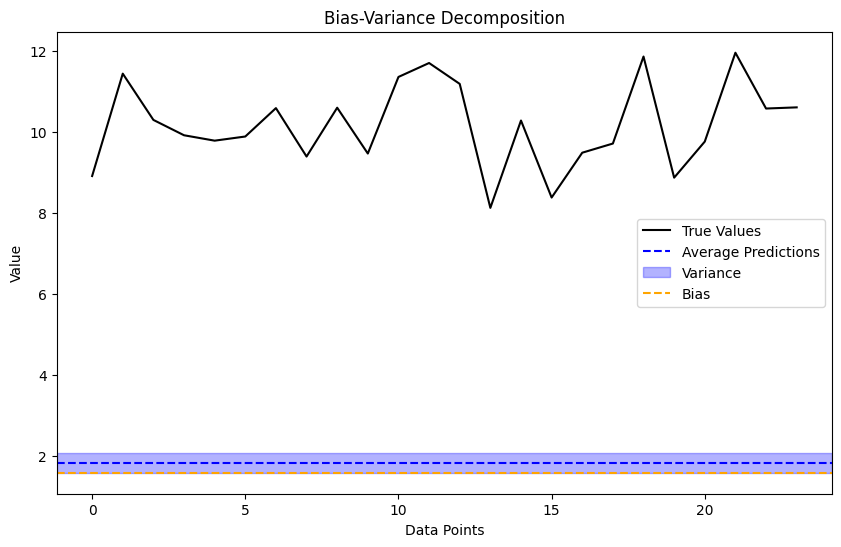

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error

# ... Load and preprocess data as before ...

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Convert DataFrames to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_val_np = X_val.values
y_val_np = y_val.values

# Perform bias-variance decomposition
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    model, X_train_np, y_train_np, X_val_np, y_val_np, loss='mse', num_rounds=10, random_seed=42
)

# Plotting bias-variance decomposition
plt.figure(figsize=(10, 6))

plt.plot(y_val_np, label='True Values', color='black')
plt.axhline(y=np.mean(avg_expected_loss), label='Average Predictions', color='blue', linestyle='--')
plt.axhspan(np.mean(avg_expected_loss) - np.mean(avg_var), np.mean(avg_expected_loss) + np.mean(avg_var), color='blue', alpha=0.3, label='Variance')
plt.axhline(y=np.mean(avg_bias), label='Bias', color='orange', linestyle='--')

plt.title("Bias-Variance Decomposition")
plt.xlabel("Data Points")
plt.ylabel("Value")
plt.legend()
plt.show()


# 2. Learning curve for bias variance tradeoff analysis

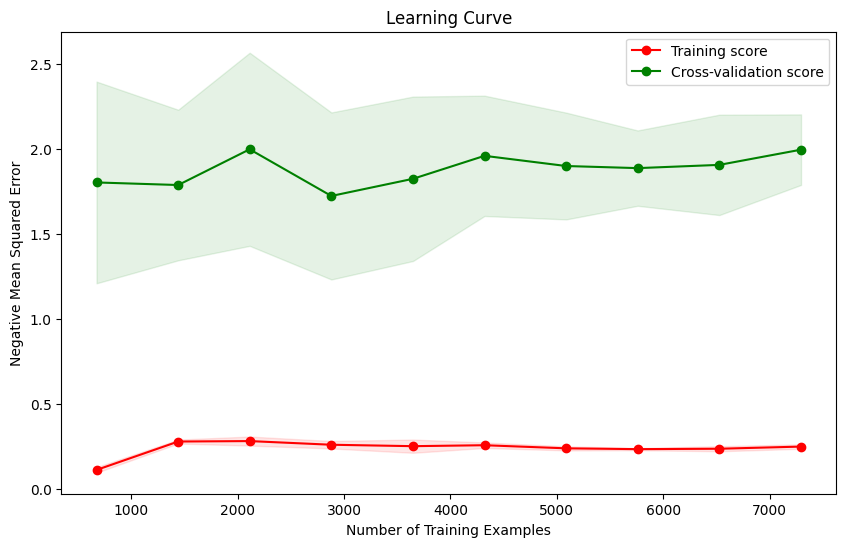

Bias: 3.53
Variance: 0.17


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# ... Load and preprocess data as before ...

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Convert DataFrames to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values

# Create a custom scoring function for mean squared error
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train_np, y_train_np, cv=5, scoring=scorer, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of train and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotting learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes * len(X_train_np), train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes * len(X_train_np), val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes * len(X_train_np), train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes * len(X_train_np), val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Number of Training Examples")
plt.ylabel("Negative Mean Squared Error")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

# Calculate bias-variance trade-off
bias = np.square(val_scores_mean)
variance = val_scores_std**2

print(f"Bias: {np.mean(bias):.2f}")
print(f"Variance: {np.mean(variance):.2f}")


# 3. Validation curve for bias variance tradeoff analysis

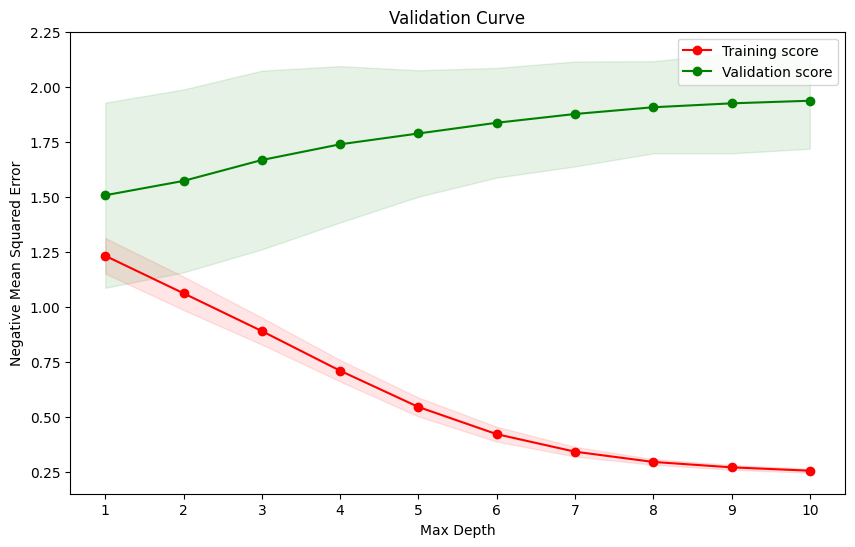

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# ... Load and preprocess data as before ...

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Convert DataFrames to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values

# Create a custom scoring function for mean squared error
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define different values of the hyperparameter (e.g., max_depth)
param_range = np.arange(1, 11)

# Calculate validation curve
train_scores, val_scores = validation_curve(
    model, X_train_np, y_train_np, param_name='max_depth', param_range=param_range,
    cv=5, scoring=scorer
)

# Calculate mean and standard deviation of train and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotting validation curve
plt.figure(figsize=(10, 6))
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(param_range, val_scores_mean, 'o-', color="g", label="Validation score")
plt.xlabel("Max Depth")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curve")
plt.legend(loc="best")
plt.xticks(param_range)
plt.show()


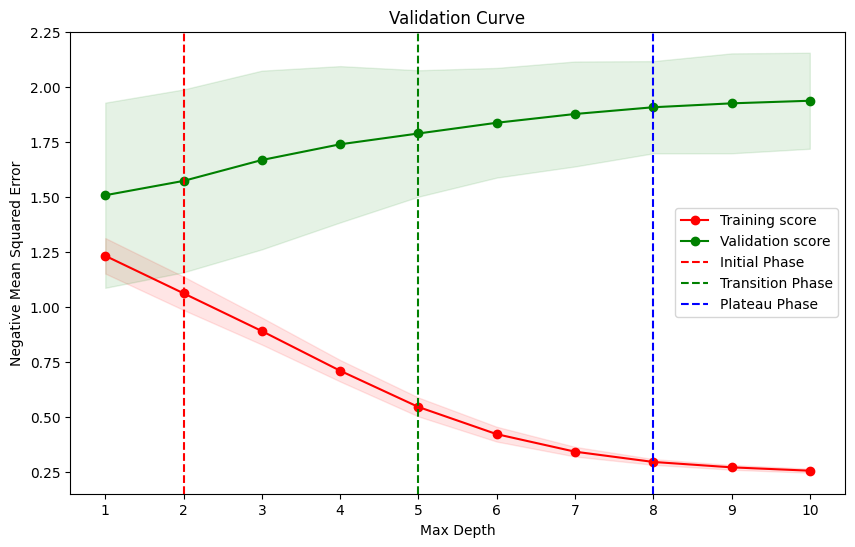

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# ... Load and preprocess data as before ...

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Convert DataFrames to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values

# Create a custom scoring function for mean squared error
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define different values of the hyperparameter (e.g., max_depth)
param_range = np.arange(1, 11)

# Calculate validation curve
train_scores, val_scores = validation_curve(
    model, X_train_np, y_train_np, param_name='max_depth', param_range=param_range,
    cv=5, scoring=scorer
)

# Calculate mean and standard deviation of train and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotting validation curve
plt.figure(figsize=(10, 6))
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(param_range, val_scores_mean, 'o-', color="g", label="Validation score")

# Marking phases on the validation curve
best_max_depth_initial = 2  # Adjust based on your analysis
best_max_depth_transition = 5  # Adjust based on your analysis
best_max_depth_plateau = 8  # Adjust based on your analysis
plt.axvline(x=best_max_depth_initial, color='red', linestyle='--', label='Initial Phase')
plt.axvline(x=best_max_depth_transition, color='green', linestyle='--', label='Transition Phase')
plt.axvline(x=best_max_depth_plateau, color='blue', linestyle='--', label='Plateau Phase')

plt.xlabel("Max Depth")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curve")
plt.legend(loc="best")
plt.xticks(param_range)
plt.show()


#### Based on the validation curve plot:

##### In the initial phase, when max_depth is very low, the model is underfitting, and both training and validation scores are high.

##### In the transition phase, as max_depth increases, both scores improve, suggesting that the model is finding a good level of complexity.

##### In the plateau phase, as max_depth becomes very high, the model starts overfitting, leading to a divergence between training and validation scores.

###### The goal is to choose a max_depth value that provides a balanced trade-off between underfitting and overfitting. It's often better to select a value that falls within the transition phase, where both training and validation scores are reasonably low and close to each other. This indicates that the model is capturing relevant patterns in the data without overcomplicating things.